## EDA - U.S. Census Income Dataset

**Objective:**  
- The goal of this notebook is to explore the U.S. Census dataset to identify patterns and relationships between demographic/economic characteristics and income level (`<=50k` vs `>50k`).  
- We will walk through the steps performed during the analysis along with observations. 

### Data Overview
- First we import our necessary packages and configure the notebook visualization settings. 
- As we load in the training and testing datasets, we notice the data does not include column headers. Using the supplementary documentation provided in the assessment, the proper column names are added to the data. 
- We get an initial idea of the shape of the training and test sets, as well as a first look at the dataset itself. 
- We save the datasets with column headers to use later on.
- The data includes numerical and categorical features. During our analysis and eventual data cleaning, we will need to account for different techniques for different data types. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mannwhitneyu, chi2_contingency

plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')
pd.set_option('display.max_columns', None)

In [2]:
train_df = pd.read_csv('../data/census_income_learn.csv')
test_df = pd.read_csv('../data/census_income_test.csv')

column_names = [
    'age', 
    'class_of_worker', 
    'industry_code',
    'occupation_code',
    'education',
    'wage_per_hour',
    'enrolled_in_edu_inst_last_wk',
    'marital_status',
    'major_industry_code',
    'major_occupation_code',
    'race', 
    'hispanic_origin',
    'sex', 
    'member_of_labor_union',
    'reason_for_unemployment',
    'full_or_part_time_employment_stat', 
    'capital_gains',
    'capital_losses',
    'dividends_from_stocks',
    'tax_filer_status', 
    'region_of_previous_residence',
    'state_of_previous_residence',
    'detailed_household_and_family_stat',
    'detailed_household_summary_in_household',
    'instance_weight',
    'migration_code_change_in_msa', 
    'migration_code_change_in_reg',
    'migration_code_move_within_reg', 
    'live_in_this_house_1_year_ago',
    'migration_prev_res_in_sunbelt', 
    'num_persons_worked_for_employer',
    'family_members_under_18',
    'country_of_birth_father', 
    'country_of_birth_mother',
    'country_of_birth_self',
    'citizenship', 
    'own_business_or_self_employed',
    'fill_inc_questionnaire_for_veteran_admin', 
    'veterans_benefits',
    'weeks_worked_in_year',
    'year', 
    'label',
]

train_df.columns = column_names
test_df.columns = column_names

print('Train shape: ', train_df.shape)
print('Test shape: ', test_df.shape)

Train shape:  (199522, 42)
Test shape:  (99761, 42)


In [3]:
train_df.to_csv('../data/train.csv', index=False)
test_df.to_csv('../data/test.csv', index=False)

In [4]:
train_df.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,tax_filer_status,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,instance_weight,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran_admin,veterans_benefits,weeks_worked_in_year,year,label
0,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
1,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
2,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
3,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,Not in universe,Full-time schedules,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,162.61,?,?,?,Not in universe under 1 year old,?,1,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.


In [ ]:
cat_features = train_df.select_dtypes(include=['object']).columns
num_features = train_df.select_dtypes(exclude=['object']).columns

print('Categorical features:', cat_features.tolist())
print('Numerical features:', num_features.tolist())

Categorical features: ['class_of_worker', 'education', 'enrolled_in_edu_inst_last_wk', 'marital_status', 'major_industry_code', 'major_occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_labor_union', 'reason_for_unemployment', 'full_or_part_time_employment_stat', 'tax_filer_status', 'region_of_previous_residence', 'state_of_previous_residence', 'detailed_household_and_family_stat', 'detailed_household_summary_in_household', 'migration_code_change_in_msa', 'migration_code_change_in_reg', 'migration_code_move_within_reg', 'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt', 'family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'fill_inc_questionnaire_for_veteran_admin', 'label']
Numerical features: ['age', 'industry_code', 'occupation_code', 'wage_per_hour', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 'instance_weight', 'num_persons_worked_for_employer', 'own_business_or_self_emplo

### Categorical Features

- We first investigate the categorical features further. 
- An initial observation is there are 11 features with at least 10 unique values. When encoding the data or grouping values, this will need to be a consideration. Depending on our modeling technique, this also should be considered. One-hot encoding a high-cardinality feature may be suitable for logistic models, but it could create an overly complex tree-based model. 
- We look at some visualizations to show some of the categorical features in relation to our target variable. 
- We also look at visualizations of the distributions of the categorical features. We can see a fair amount of values for `?` and `Not in universe` across the features. This will need to be considered when data cleaning. 

In [13]:
train_df[cat_features].nunique().sort_values()

sex                                          2
label                                        2
member_of_labor_union                        3
enrolled_in_edu_inst_last_wk                 3
live_in_this_house_1_year_ago                3
fill_inc_questionnaire_for_veteran_admin     3
migration_prev_res_in_sunbelt                4
race                                         5
citizenship                                  5
family_members_under_18                      5
tax_filer_status                             6
reason_for_unemployment                      6
region_of_previous_residence                 6
marital_status                               7
full_or_part_time_employment_stat            8
detailed_household_summary_in_household      8
class_of_worker                              9
migration_code_change_in_reg                 9
migration_code_change_in_msa                10
migration_code_move_within_reg              10
hispanic_origin                             10
major_occupat

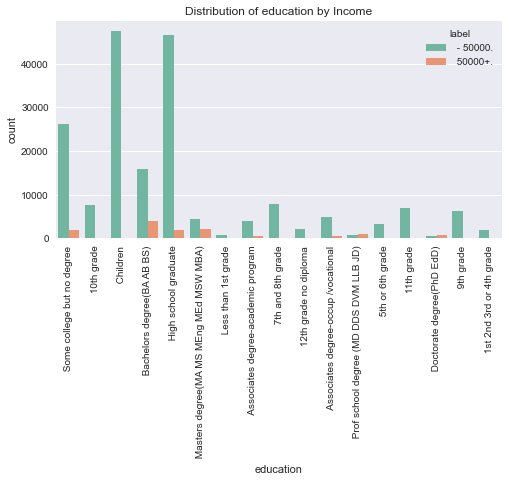

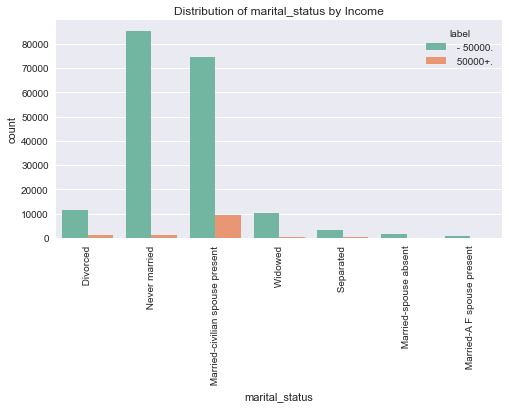

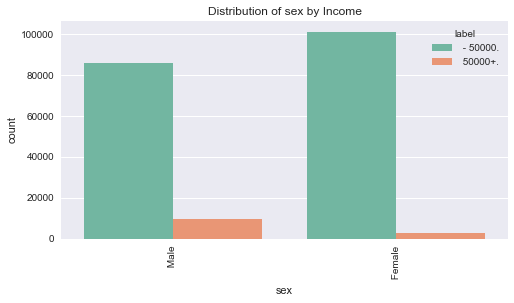

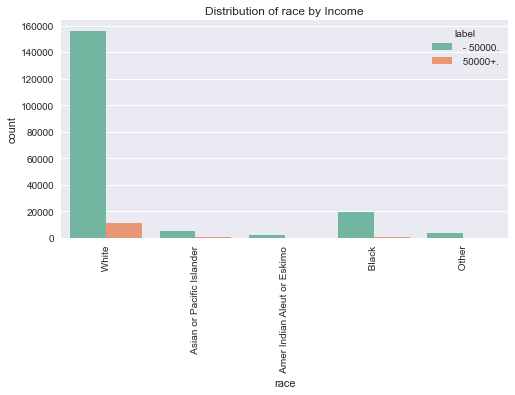

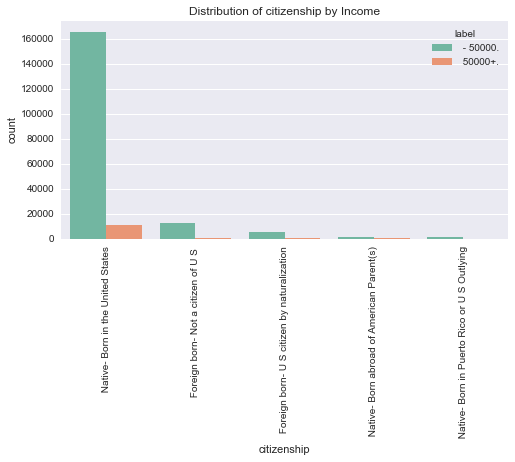

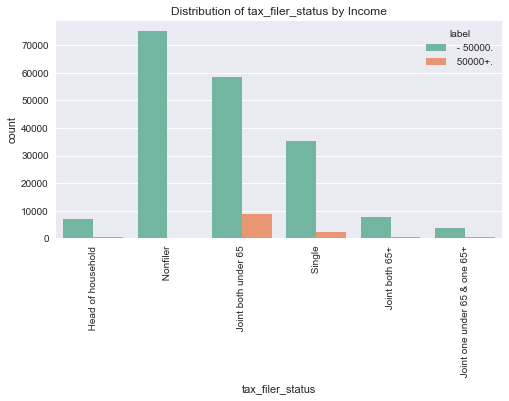

In [ ]:
for col in ['education', 'marital_status', 'sex', 'race', 'citizenship', 'tax_filer_status']:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='label', data=train_df)
    plt.title(f'Distribution of {col} by Income')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.show()

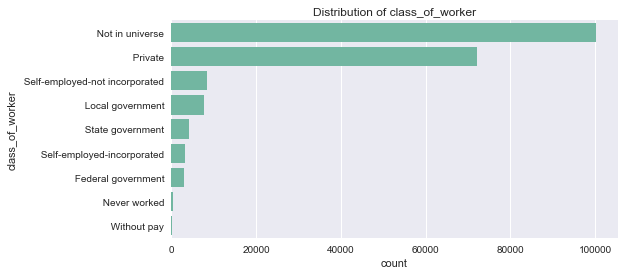

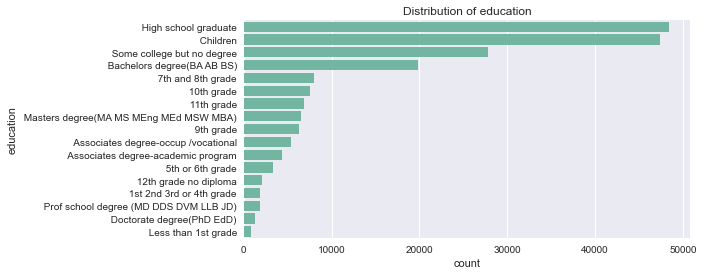

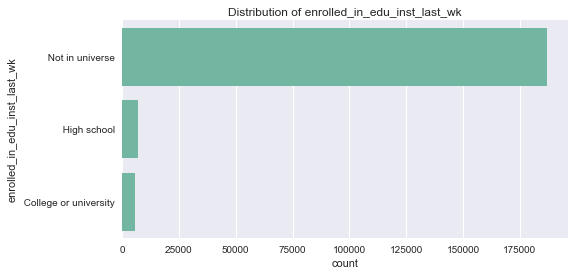

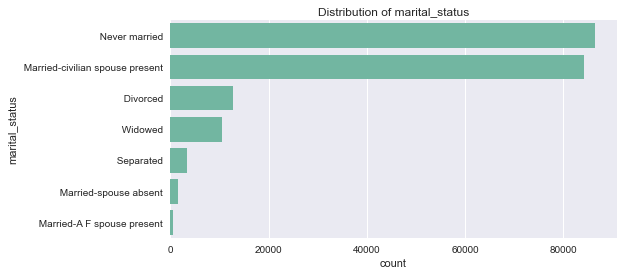

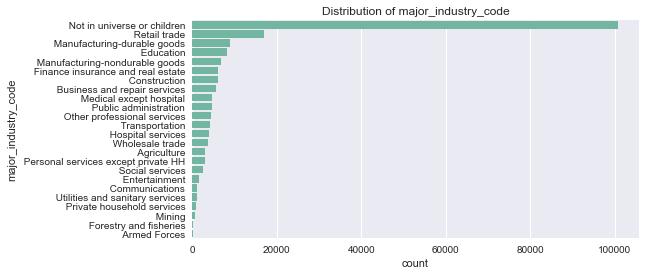

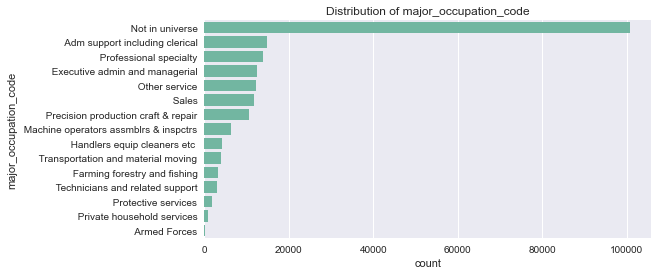

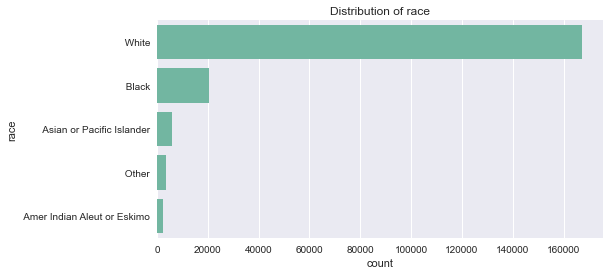

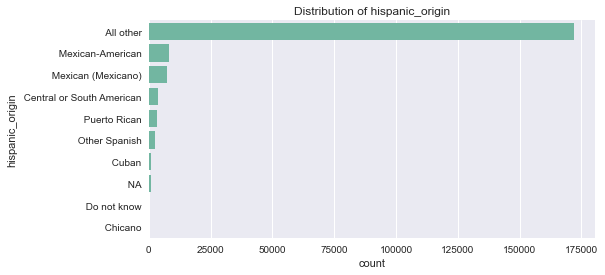

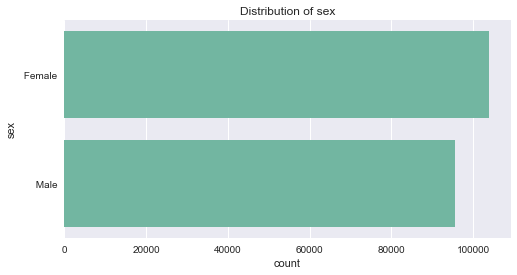

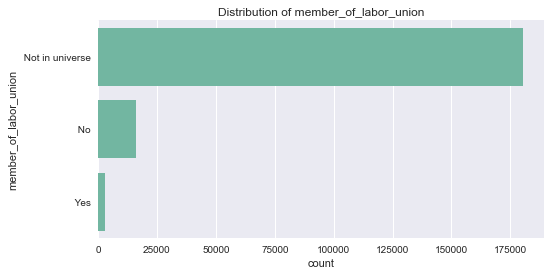

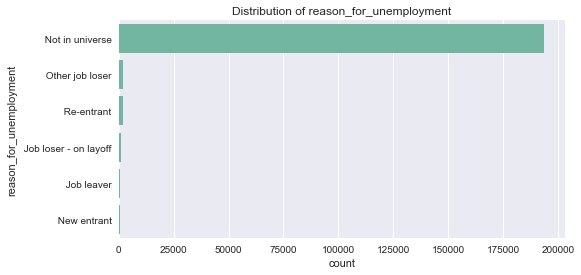

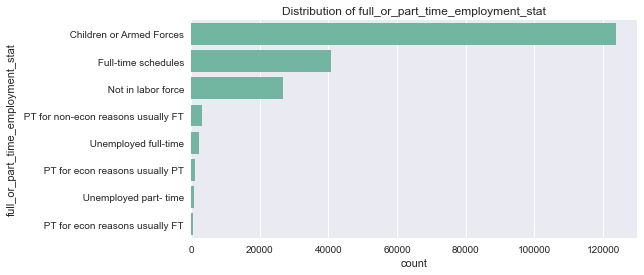

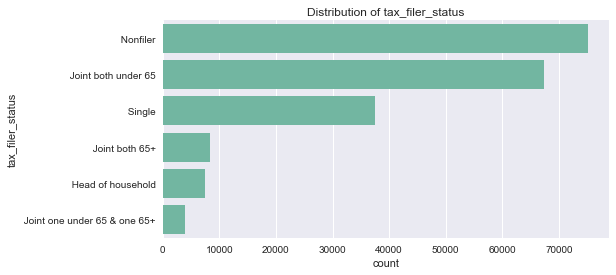

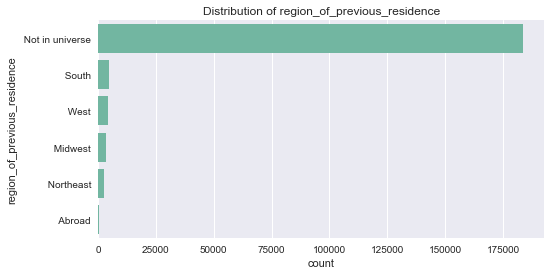

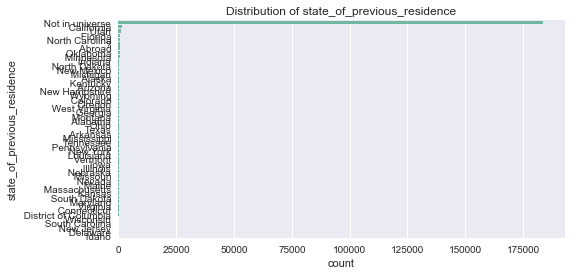

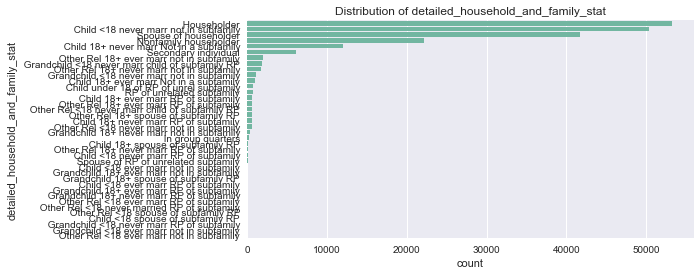

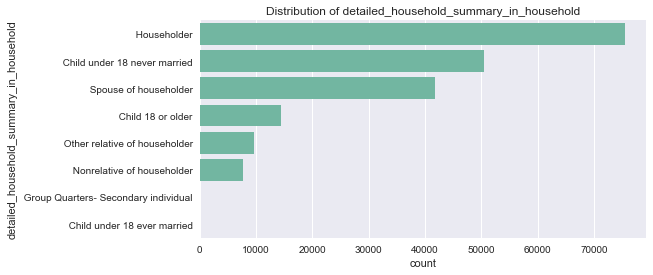

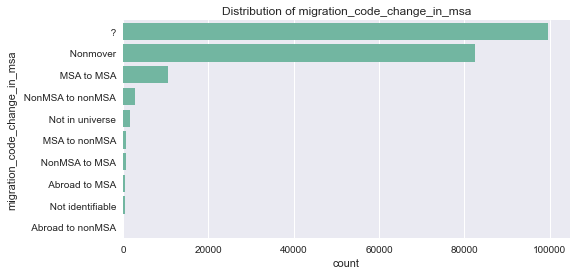

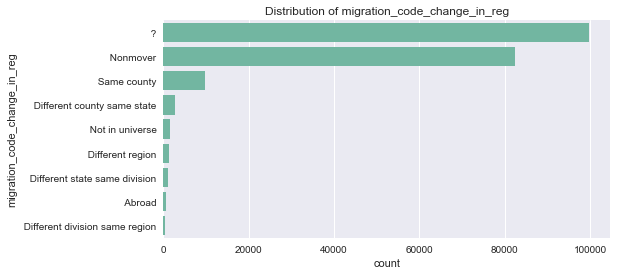

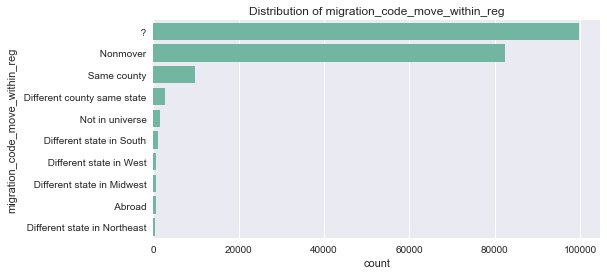

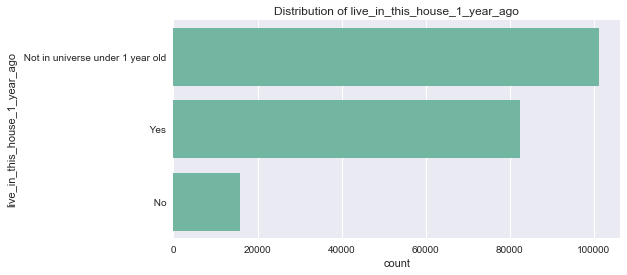

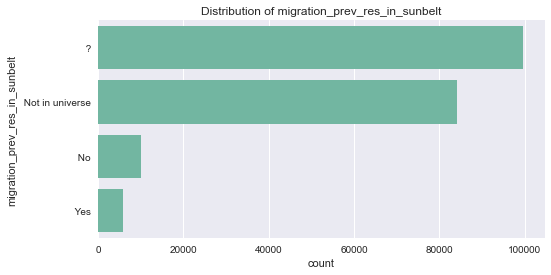

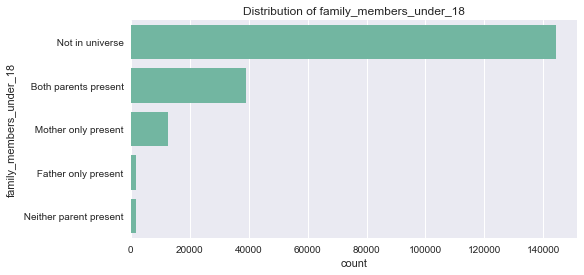

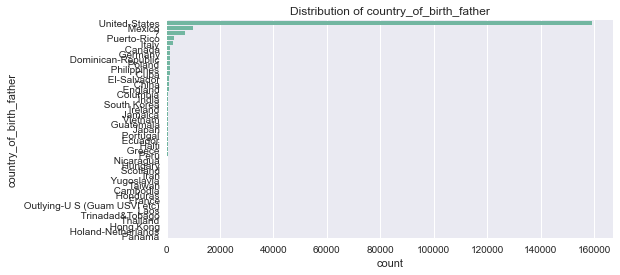

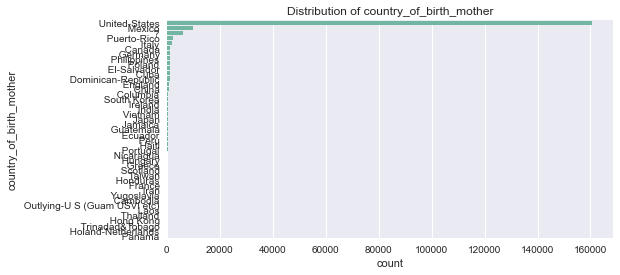

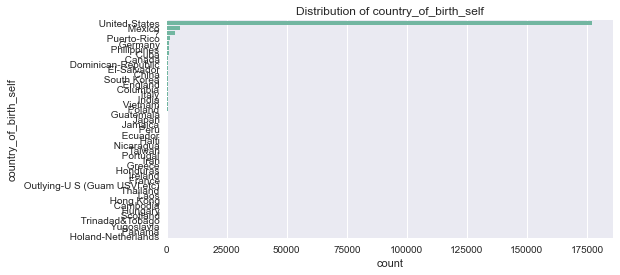

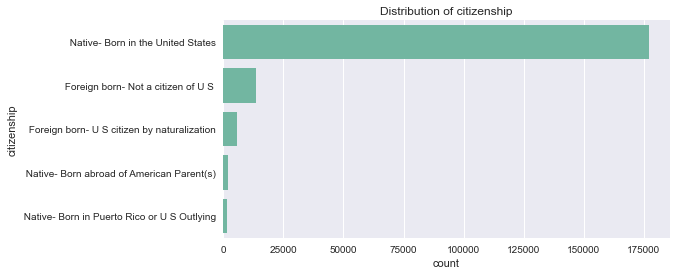

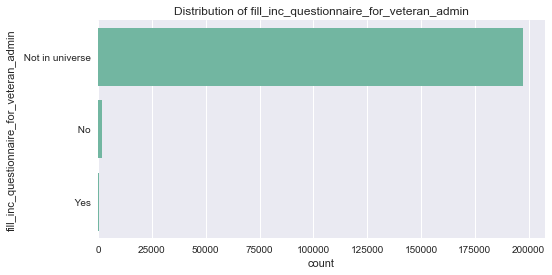

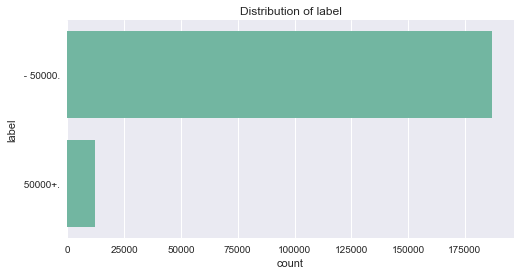

In [ ]:
for col in cat_features:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=train_df, order=train_df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

### Numeric Features
- We first look at the distributions of the numeric features. Initial observations: 
    - Age is right skewed, with most people between 20-50
    - Industry code and occupation code have many sparse values
        - These should maybe be treated as categorical instead of numeric
    - Wage per hour is extremely left skewed 
        - Most people are probably not reporting hourly wages
        - Could create a binary feature for wage per hour > 0
    - Capital gains, capital losses, and dividends from stocks have most values at 0
        - Could change them to be binary features
    - Veterans benefits is almost always 0, and is most likely not strongly predictive due to low variance
- We also look at the numeric features in comparison to the target variable. Main observations:
    - People reporting >50k tend to have worked employers with more employees (num_persons_worked_for_employer)
    - Veterans benefits has very little predictive value because it’s almost always 0, regardless of income. This feature should be dropped

In [15]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,199522.0,34.494006,22.310785,0.00,15.0000,33.00,50.00,90.0
industry_code,199522.0,15.352397,18.067141,0.00,0.0000,0.00,33.00,51.0
occupation_code,199522.0,11.306613,14.454218,0.00,0.0000,0.00,26.00,46.0
wage_per_hour,199522.0,55.427186,274.897115,0.00,0.0000,0.00,0.00,9999.0
capital_gains,199522.0,434.721169,4697.542951,0.00,0.0000,0.00,0.00,99999.0
capital_losses,199522.0,37.313975,271.897097,0.00,0.0000,0.00,0.00,4608.0
dividends_from_stocks,199522.0,197.530523,1984.168581,0.00,0.0000,0.00,0.00,99999.0
instance_weight,199522.0,1740.380471,993.770642,37.87,1061.6075,1618.31,2188.61,18656.3
num_persons_worked_for_employer,199522.0,1.956190,2.365127,0.00,0.0000,1.00,4.00,6.0
own_business_or_self_employed,199522.0,0.175439,0.553696,0.00,0.0000,0.00,0.00,2.0


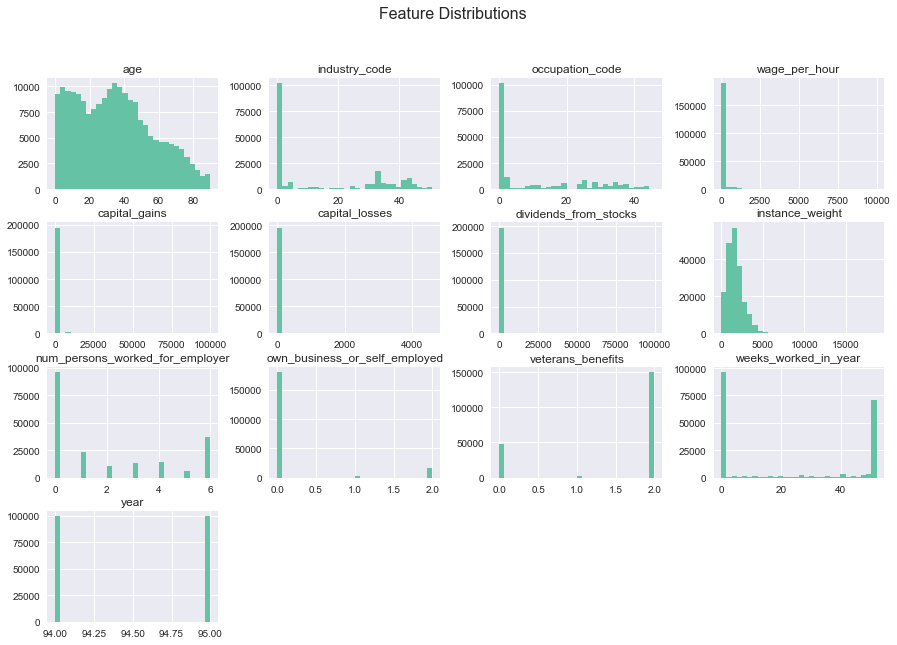

In [ ]:
train_df.drop(columns='label').hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

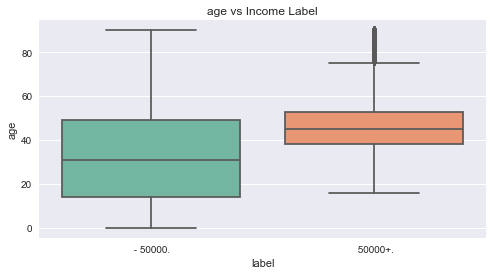

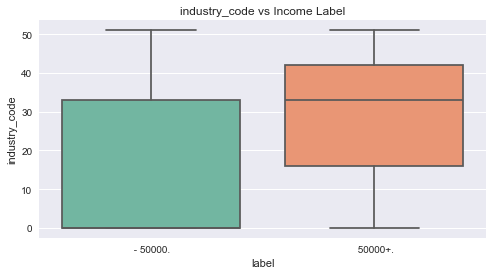

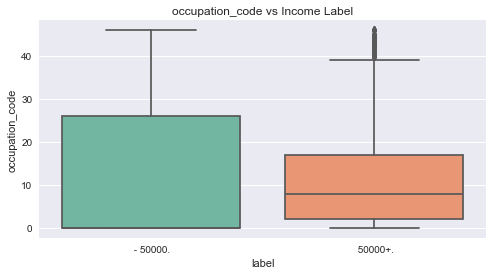

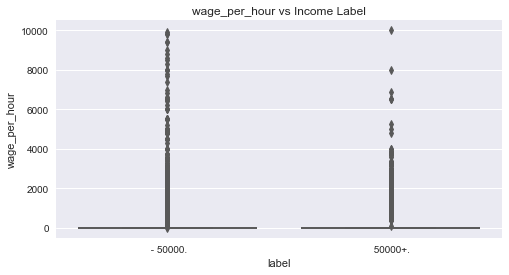

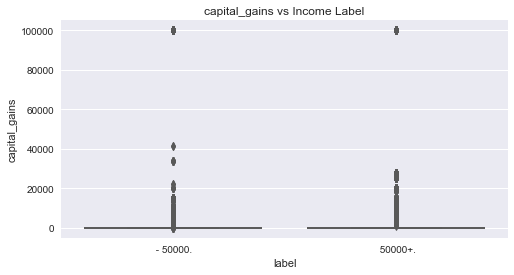

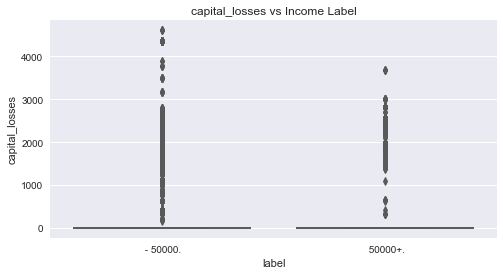

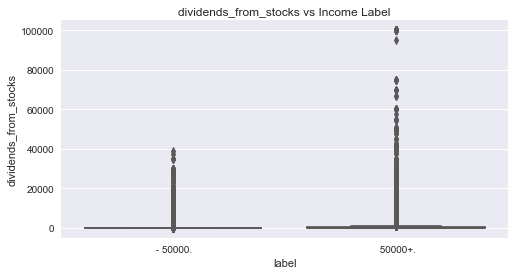

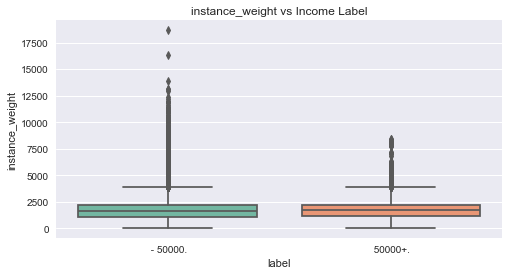

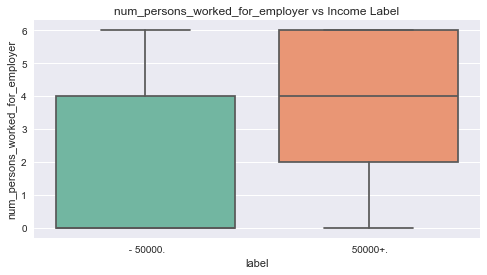

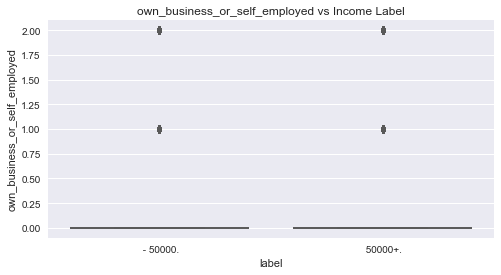

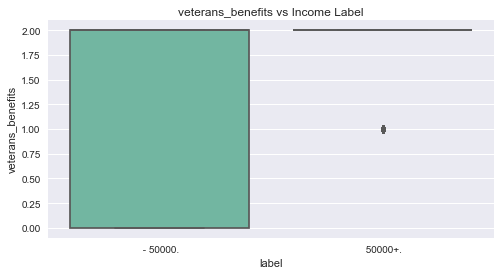

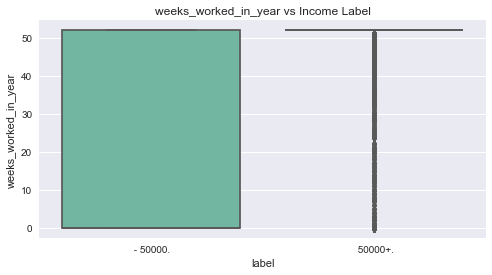

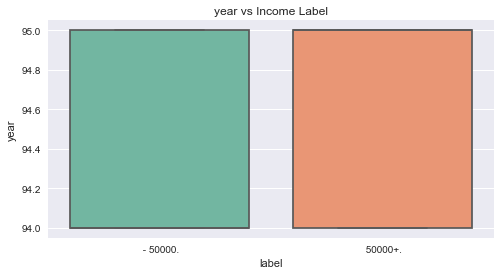

In [ ]:
for col in num_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=train_df, x='label', y=col)
    plt.title(f'{col} vs Income Label')
    plt.show()

### Missing Values
- We see that there are no values initially listed as nan in the dataset. However, there are missing values simply listed as a different value. From the visualizations, we see `?`, `NA`, `Not in universe`, and `Do not know` exist across some features. We will treat those as null values. 
- There are 15 features with at least 50% of the values set to null. Any sort of imputation would not provide value since the percentage of values to be imputed is simply too high. We will drop these features. 
- Of the columns with less than 50% null values, we quickly check if any are ordinal rather than just nominal. This will inform how we handle encoding in the preparation step. Our research from the supplemental information shows them all to be nominal. 

In [14]:
sum(train_df.isnull().sum())

0

In [8]:
mask = (train_df == ' ?') | (train_df == ' NA') | (train_df == ' Do not know') | train_df.apply(lambda col: col.astype(str).str.startswith(' Not in universe', na=False))
percentages = (mask.sum() / len(train_df) * 100).sort_values(ascending=False)

percentages

fill_inc_questionnaire_for_veteran_admin    99.005623
reason_for_unemployment                     96.957729
enrolled_in_edu_inst_last_wk                93.694931
state_of_previous_residence                 92.449454
region_of_previous_residence                92.094606
migration_prev_res_in_sunbelt               92.094606
member_of_labor_union                       90.445164
family_members_under_18                     72.288269
migration_code_change_in_msa                50.726737
migration_code_move_within_reg              50.726737
live_in_this_house_1_year_ago               50.726737
migration_code_change_in_reg                50.726737
major_occupation_code                       50.462104
major_industry_code                         50.462104
class_of_worker                             50.242079
country_of_birth_father                      3.364541
country_of_birth_mother                      3.066830
country_of_birth_self                        1.700564
hispanic_origin             

In [9]:
cols_below_50 = percentages[percentages < 50].index.tolist()

for col in cols_below_50:
    if train_df[col].dtype == 'object':
        print(f'{col}: ', (train_df[col].unique()))

country_of_birth_father:  [' United-States' ' Vietnam' ' Philippines' ' ?' ' Columbia' ' Germany'
 ' Mexico' ' Japan' ' Peru' ' Dominican-Republic' ' South Korea' ' Cuba'
 ' El-Salvador' ' Canada' ' Scotland' ' Outlying-U S (Guam USVI etc)'
 ' Italy' ' Guatemala' ' Ecuador' ' Puerto-Rico' ' Cambodia' ' China'
 ' Poland' ' Nicaragua' ' Taiwan' ' England' ' Ireland' ' Hungary'
 ' Yugoslavia' ' Trinadad&Tobago' ' Jamaica' ' Honduras' ' Portugal'
 ' Iran' ' France' ' India' ' Hong Kong' ' Haiti' ' Greece'
 ' Holand-Netherlands' ' Thailand' ' Laos' ' Panama']
country_of_birth_mother:  [' United-States' ' Vietnam' ' ?' ' Columbia' ' Mexico' ' El-Salvador'
 ' Peru' ' Puerto-Rico' ' Cuba' ' Philippines' ' Dominican-Republic'
 ' Germany' ' England' ' Guatemala' ' Scotland' ' Portugal' ' Italy'
 ' Ecuador' ' Yugoslavia' ' China' ' Poland' ' Hungary' ' Nicaragua'
 ' Taiwan' ' Ireland' ' Canada' ' South Korea' ' Trinadad&Tobago'
 ' Jamaica' ' Honduras' ' Iran' ' France' ' Cambodia' ' India'
 ' Hon

### Target Variable
- We show the distribution of the target variable in our training dataset. 
- The distribution is highly imbalanced, with ~90% of the values set to `-50000` and the rest at `50000+`. 
- This is important to note for when we start modeling. We will need to explore techniques like SMOTE, resampling, or indicating class weights in the model fit. 

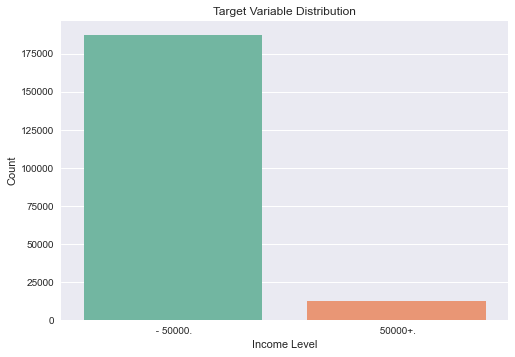

In [73]:
sns.countplot(x='label', data=train_df, hue='label')
plt.title('Target Variable Distribution')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.show()

## Correlation
- The heatmap shows some interesting relationships. 
    - Age is highly correlated with veterans benefits. This makes sense, as some veterans benefits kick in at a certain age. 
    - Occupation and industry codes are tied to number of weeks worked in a year. Some occupations are seasonal, while others are year round. 
- A Mann-Whitney U test was done for the numeric features. Here are the takeaways: 
    - Wealth indicators (capital gains, losses, dividends) show the strongest separation between income groups.
    - Work intensity features (weeks worked, wage per hour, num persons worked) significantly differ by income.
    - Age, occupation, and industry codes also strongly separate the groups, meaning both demographics and employment type matter.
- A Chi Squared test was done for the categorical features. Our observations: 
    - Education, marital status, and class of worker are among the most discriminative features.
    - Household/family structure and employment status (full vs part-time, union membership) show strong associations with income.
    - Demographic and origin features (race, Hispanic origin, citizenship, country of birth) are statistically significant, but should be monitored carefully for fairness.

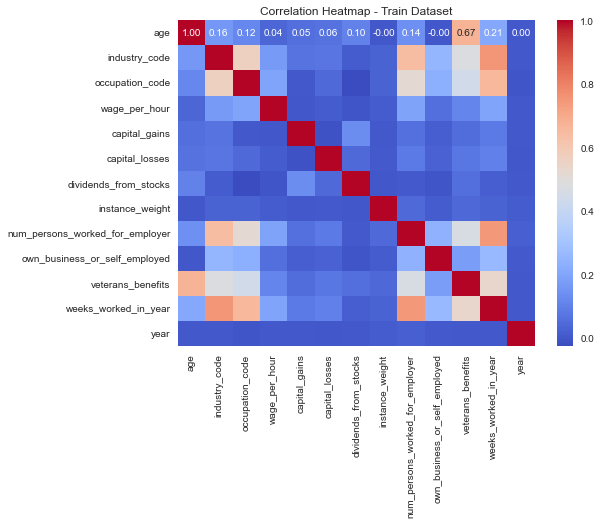

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(train_df[num_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap - Train Dataset')
plt.show()

In [ ]:
low_income = train_df[train_df['label'] == ' - 50000.']
high_income = train_df[train_df['label'] == ' 50000+.']

print('=== Numeric Feature Tests (High vs Low income) ===\n')
for col in num_features:
    group1 = low_income[col].dropna()
    group2 = high_income[col].dropna()
    
    stat, pval = mannwhitneyu(group1, group2, alternative='two-sided')
    print(f'{col:25} | Mann-Whitney U p-value = {pval:.3e}')

=== Numeric Feature Tests (High vs Low income) ===

age                       | Mann-Whitney U p-value = 0.000e+00
industry_code             | Mann-Whitney U p-value = 0.000e+00
occupation_code           | Mann-Whitney U p-value = 0.000e+00
wage_per_hour             | Mann-Whitney U p-value = 3.895e-07
capital_gains             | Mann-Whitney U p-value = 0.000e+00
capital_losses            | Mann-Whitney U p-value = 0.000e+00
dividends_from_stocks     | Mann-Whitney U p-value = 0.000e+00
instance_weight           | Mann-Whitney U p-value = 8.236e-17
num_persons_worked_for_employer | Mann-Whitney U p-value = 0.000e+00
own_business_or_self_employed | Mann-Whitney U p-value = 4.258e-118
veterans_benefits         | Mann-Whitney U p-value = 0.000e+00
weeks_worked_in_year      | Mann-Whitney U p-value = 0.000e+00
year                      | Mann-Whitney U p-value = 3.878e-11


In [ ]:
print('\n=== Categorical Feature Tests (Chi-square) ===\n')
for col in cat_features:
    contingency = pd.crosstab(train_df[col], train_df['label'])
    if contingency.shape[0] > 1:  
        chi2, pval, dof, ex = chi2_contingency(contingency)
        print(f'{col:35} | Chi-square p-value = {pval:.3e}')


=== Categorical Feature Tests (Chi-square) ===

class_of_worker                     | Chi-square p-value = 0.000e+00
education                           | Chi-square p-value = 0.000e+00
enrolled_in_edu_inst_last_wk        | Chi-square p-value = 3.016e-179
marital_status                      | Chi-square p-value = 0.000e+00
major_industry_code                 | Chi-square p-value = 0.000e+00
major_occupation_code               | Chi-square p-value = 0.000e+00
race                                | Chi-square p-value = 1.148e-147
hispanic_origin                     | Chi-square p-value = 2.221e-196
sex                                 | Chi-square p-value = 0.000e+00
member_of_labor_union               | Chi-square p-value = 1.990e-244
reason_for_unemployment             | Chi-square p-value = 1.012e-31
full_or_part_time_employment_stat   | Chi-square p-value = 0.000e+00
tax_filer_status                    | Chi-square p-value = 0.000e+00
region_of_previous_residence        | Chi-square p

### Revisiting Analysis After Data Cleaning & Preparation

In [3]:
def plot_feature_against_label(df: pd.DataFrame, feature: str, xlabel: str):
    '''
    Creates a plot of a feature against income level (our target variable).
    Utilizes the `instance_weight` feature to capture the feature in the actual U.S. population.
    '''
    weighted_counts = (
      df.groupby([feature, 'label'], observed=True)['instance_weight']
        .sum()
        .reset_index()
    )

    weighted_counts['prop'] = (
      weighted_counts.groupby(feature, observed=True)['instance_weight']
      .transform(lambda x: x / x.sum())
    )

    plot_df = weighted_counts.pivot(
        index=feature, columns='label', values='prop'
    )

    ax = plot_df.plot(kind='bar', stacked=True, figsize=(10,6))

    plt.title(f'Income Distribution by {xlabel} (Weighted)')
    plt.ylabel('Proportion of Population')
    plt.xlabel(f'{xlabel}')
    plt.legend(title='Income > 50k', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

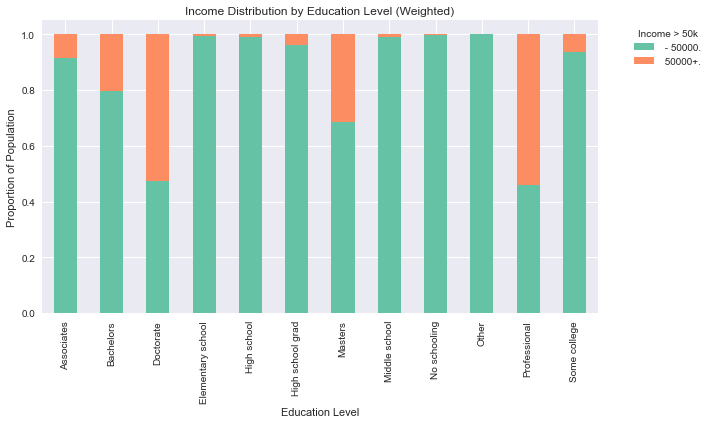

In [5]:
EDUCATION_GROUPS = {
    ' No schooling': 'No schooling',
    ' Less than 1st grade': 'No schooling',
    ' 1st 2nd 3rd or 4th grade': 'Elementary school',
    ' 5th or 6th grade': 'Elementary school',
    ' 7th and 8th grade': 'Middle school',
    ' 9th grade': 'High school',
    ' 10th grade': 'High school',
    ' 11th grade': 'High school',
    ' 12th grade no diploma': 'High school',
    ' High school graduate': 'High school grad',
    ' Some college but no degree': 'Some college',
    ' Associates degree-academic program': 'Associates',
    ' Associates degree-occup /vocational': 'Associates',
    ' Bachelors degree(BA AB BS)': 'Bachelors',
    ' Masters degree(MA MS MEng MEd MSW MBA)': 'Masters',
    ' Prof school degree (MD DDS DVM LLB JD)': 'Professional',
    ' Doctorate degree(PhD EdD)': 'Doctorate',
    ' Children': 'Other'
}
new_df = train_df.copy()
new_df['education_grouped'] = new_df['education'].map(EDUCATION_GROUPS)

plot_feature_against_label(new_df, 'education_grouped', 'Education Level')

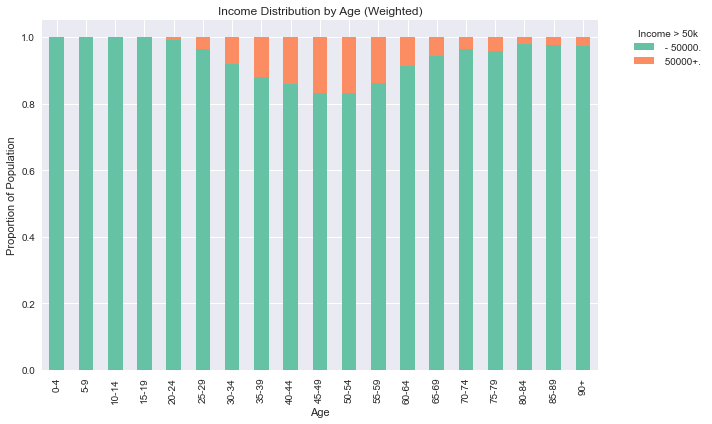

In [10]:
age_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]  
age_labels = [
    '0-4',
    '5-9',
    '10-14',
    '15-19',
    '20-24',
    '25-29',
    '30-34',
    '35-39',
    '40-44',
    '45-49',
    '50-54',
    '55-59',
    '60-64',
    '65-69',
    '70-74',
    '75-79',
    '80-84',
    '85-89',
    '90+'
]

new_df['age_grouped'] = pd.cut(
    new_df['age'],
    bins=age_bins,
    labels=age_labels,
    right=False,  
)

plot_feature_against_label(new_df, 'age_grouped', 'Age')

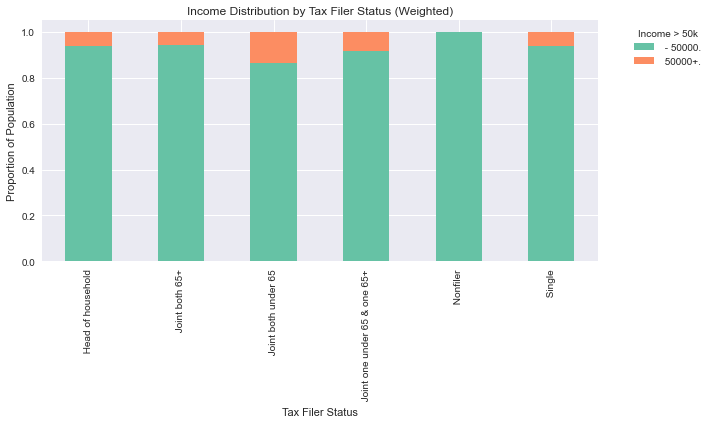

In [47]:
plot_feature_against_label(new_df, 'tax_filer_status', 'Tax Filer Status')

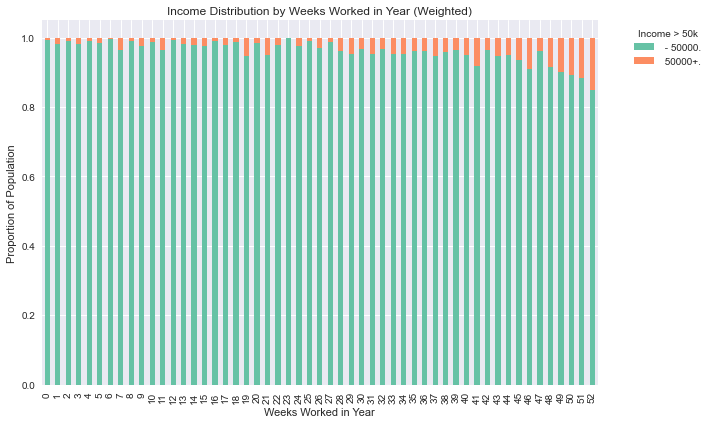

In [48]:
plot_feature_against_label(new_df, 'weeks_worked_in_year', 'Weeks Worked in Year')

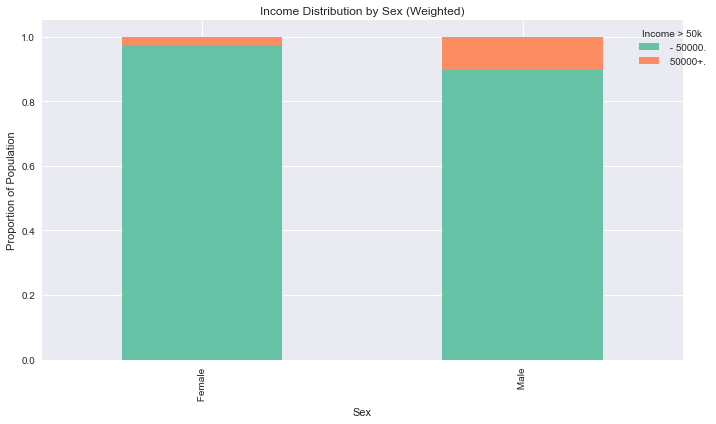

In [49]:
plot_feature_against_label(new_df, 'sex', 'Sex')

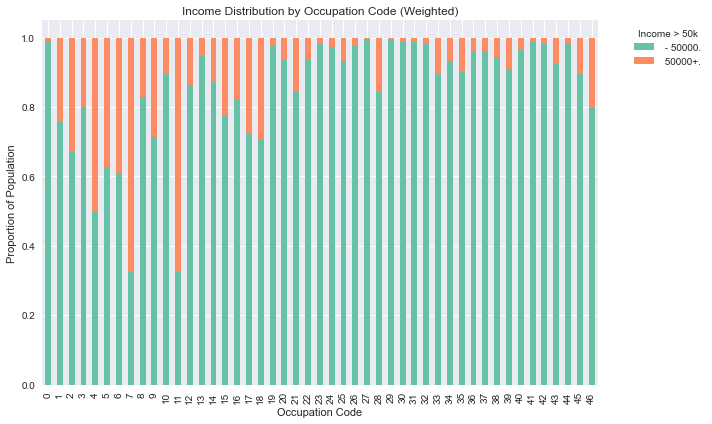

In [58]:
# OCCUPATION_MAPS = {
#    1: 'General Ops/Marketing/Sales',
#    2: 'HR/Farmers', 
#    3: 'Education', 
#    4: 'Agents', 
#    5: 'Business Ops Specialists', 
#    6: 'Accountants', 
#    7: 'Financial Specialists', 
#    8: 'Computer Science', 
#    9: 'Actuaries/Mathematicians', 
#    10: 'Architects', 
#    11: 'Surveyors,',
#    12: 'Engineering',
#    13: 'Scientists',
#    14: 'Economists,',
#    15: 'Psychologists', 
#    16: 'Agriculture', 
#    17: 'Social Services', 
#    18: 'Legal', 
#    19: 'Paralegals', 
#    20: 'Postsecondary Teachers',
#    21: 'Early School Teachers', 
#    22: 'Archivists/Curators', 
#    23: 'Arts', 
#    24: 'Chiropractors/Dentists', 
#    25: 'Registered Nurses', 
#    26: 'Veterinarians', 
#    27: 'Health Diagnosing/Treating', 
#    28: 'Nursing/Home Aides', 
#    29: 'First-Line Supervisors/Managers', 
#    30: 'Law Enforcement',
#    31: 'Animal Control Workers', 
#    32: 'Chefs', 
#    33: 'Food Preparation/Server Workers', 
#    34: 'Managers of Housekeeping and Janitors', 
#    35: 'Janitors', 
#    36: 'Managers of Gaming Workers', 
#    37: 'Animal Trainers', 
#    38: 'Retail Managers', 
#    39: 'Cashiers', 
#    40: 'Office & Admin.',  
#    41: 'Farming/Fishing', 
#    42: 'Supervisors/Managers of Construction Trades', 
#    43: 'Carpenters', 
#    44: 'Carpet, Floor, & Tile Installers', 
#    45: 'Electricians', 
#    46: 'Construction & Maintenance',
# }

plot_feature_against_label(new_df, 'occupation_code', 'Occupation Code')

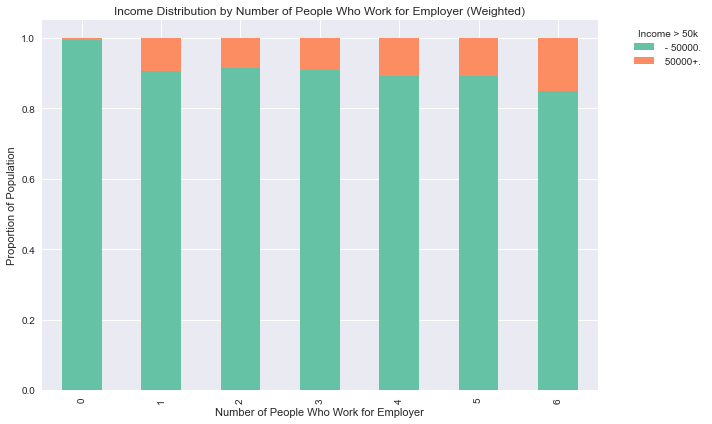

In [51]:
plot_feature_against_label(new_df, 'num_persons_worked_for_employer', 'Number of People Who Work for Employer')

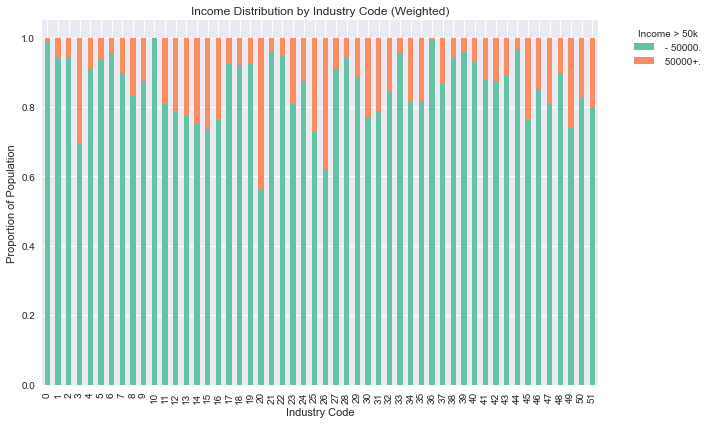

In [52]:
plot_feature_against_label(new_df, 'industry_code', 'Industry Code')

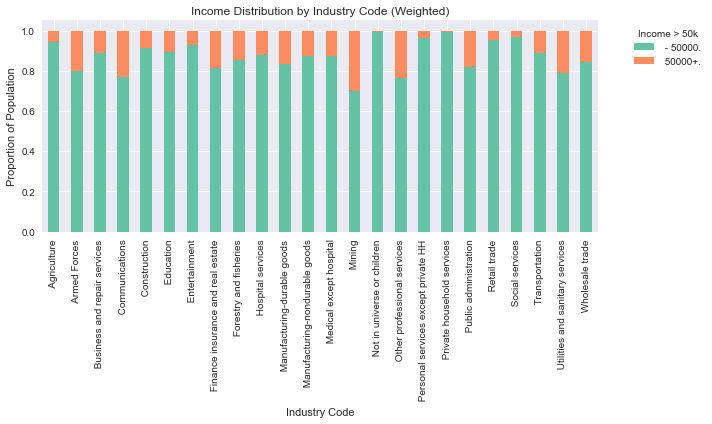

In [56]:
plot_feature_against_label(new_df, 'major_industry_code', 'Industry Code')

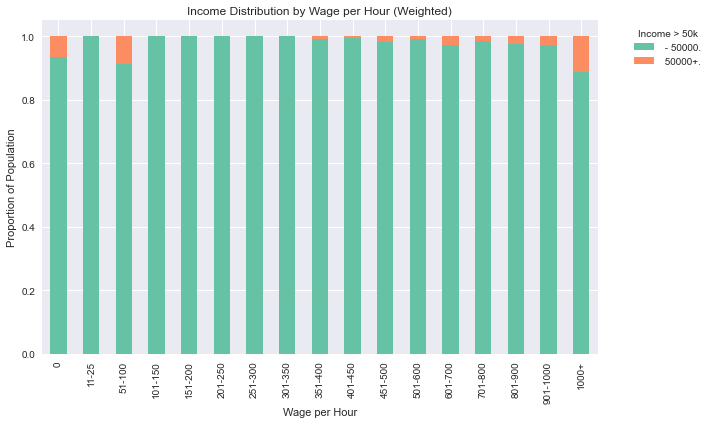

In [68]:
wage_bins = [-0.1, 0, 10, 25, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000, float('inf')]
wage_labels = [
    '0', 
    '1-10', 
    '11-25', 
    '26-50', 
    '51-100', 
    '101-150', 
    '151-200',
    '201-250', 
    '251-300',
    '301-350',
    '351-400',
    '401-450',
    '451-500',
    '501-600', 
    '601-700',
    '701-800',
    '801-900',
    '901-1000',
    '1000+'
]

new_df['wage_grouped'] = pd.cut(
    new_df['wage_per_hour'],
    bins=wage_bins,
    labels=wage_labels,
    right=True
)


plot_feature_against_label(new_df, 'wage_grouped', 'Wage per Hour')

/var/folders/37/blbk7cnn4szg6j5pzxppzfvc0000gn/T/ipykernel_20056/2846586045.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['num_persons_mapped'] = plot_df['num_persons_worked_for_employer'].map(NUM_WORKERS_MAP)
/var/folders/37/blbk7cnn4szg6j5pzxppzfvc0000gn/T/ipykernel_20056/2846586045.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['num_persons_mapped'] = pd.Categorical(


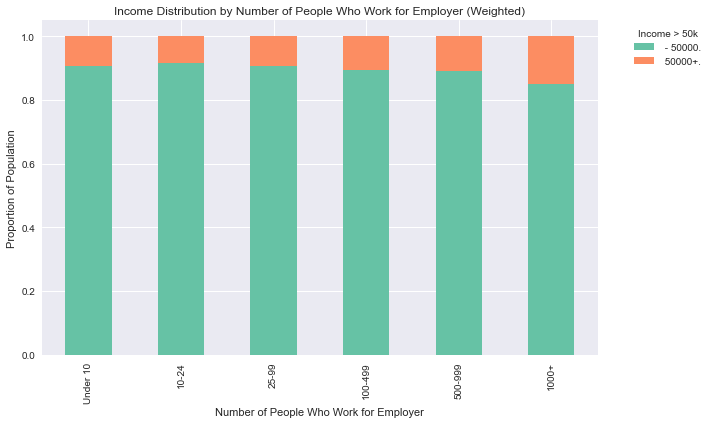

<Figure size 432x288 with 0 Axes>

In [7]:
NUM_WORKERS_MAP = {
    1: 'Under 10',
    2: '10-24',
    3: '25-99',
    4: '100-499',
    5: '500-999',
    6: '1000+'
}

plot_df = new_df[new_df['num_persons_worked_for_employer'] != 0]
plot_df['num_persons_mapped'] = plot_df['num_persons_worked_for_employer'].map(NUM_WORKERS_MAP)

ordered_categories = [NUM_WORKERS_MAP[i] for i in range(1, 7)]
plot_df['num_persons_mapped'] = pd.Categorical(
    plot_df['num_persons_mapped'],
    categories=ordered_categories,
    ordered=True
)

plot_feature_against_label(plot_df, 'num_persons_mapped', 'Number of People Who Work for Employer')
plt.savefig("myplot.png")